In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


In [87]:
df = pd.read_csv(r"C:\Users\Sid\Desktop\vit\Sem 1\ML DS\Assignment\DBSCAN\CC GENERAL.csv")
X= df.drop('CUST_ID', axis = 1)
X.fillna(method ='ffill', inplace = True)
X.head()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [89]:
X.dtypes


BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [90]:
X.shape


(8950, 17)

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)


In [84]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()



,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268880
3,-0.481656,-0.097611
4,-0.563512,-0.482506


In [95]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal)
labels = db.labels_


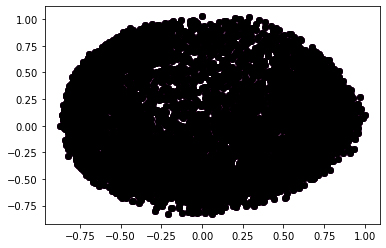

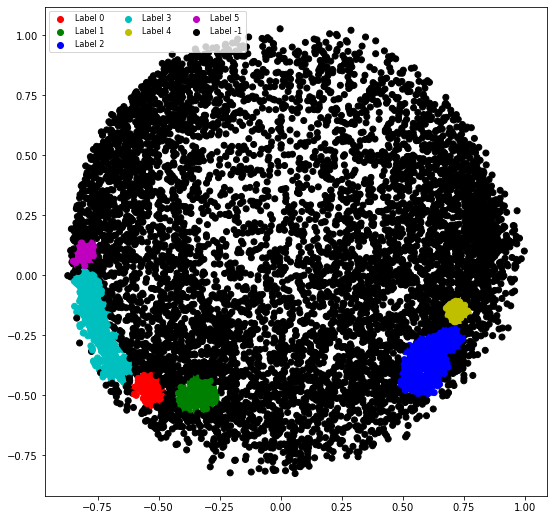

In [96]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cmap = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cmap)
plt.legend((r, g, b, c, y, m, k),('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4','Label 5', 'Label -1'),scatterpoints = 1,loc ='upper left',ncol = 3,fontsize = 8)
plt.show()
